# UNIDAD 3 - PROYECTO: ML

## Nombre del alumno: Alan Jafet Leon Loeza
## Número de control: 20120126

# PRESENTACIÓN DEL PROYECTO:
## El proyecto busca que el estudiante pueda utilizar técnicas de Machine Learning para realizar predicciones de un dataset de la vida real.
## En esta ocasión, el dataset es pequeño, por lo que se debe tener especial cuidado cuando se traten los datos y se seleccione el modelo.

# PARTE I: EDA.

## Paso 1. Carga y muestra.
### - Cargue el dataset llamado "cirrhosis.csv" en un dataframe, posteriormente muestre su información.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("cirrhosis.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

## Paso 2. Análisis estadístico.
### - De las columnas numéricas, muestre la información estadística relevante (promedio, cuartíles, desviación estándar y coeficiente de variación).
### - A través del coeficiente de variación determine qué columnas presentan mucha dispersión en sus datos.


In [4]:
#Mostrar información estadística de las columnas.
columnas_numericas = df.select_dtypes(include=['int', 'float'])
estadisticos = columnas_numericas.agg(['max', 'min', 'mean', 'std', 'median'])
display(estadisticos)

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
median,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000


In [5]:
#Coeficientes de variacion
cv = (df.std(numeric_only=True) / df.mean(numeric_only=True))
display(cv)

ID               0.576661
N_Days           0.576016
Age              0.205891
Bilirubin        1.368445
Cholesterol      0.627707
Albumin          0.121509
Copper           0.876757
Alk_Phos         1.079556
SGOT             0.462640
Tryglicerides    0.522434
Platelets        0.382553
Prothrombin      0.095232
Stage            0.291654
dtype: float64

Las columnas con mas dispersion son: Bilirubin,Copper, Alk_phos y el Cholesterol

## Paso 3. Búsqueda de nulos y datos atípicos.
### - Muestre cuántos datos nulos tienen las columnas, puede apoyarse de un gráfico para mostrar la cantidad de nulos que hay.
### - Muestre las distribuciones de las columnas numéricas y mencione si presentan datos atípicos/anomalías/outliers.


In [6]:
#Contabilizando nulos
print(df.isna().sum().sort_values(ascending=False))

Tryglicerides    136
Cholesterol      134
Copper           108
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
SGOT             106
Alk_Phos         106
Platelets         11
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64


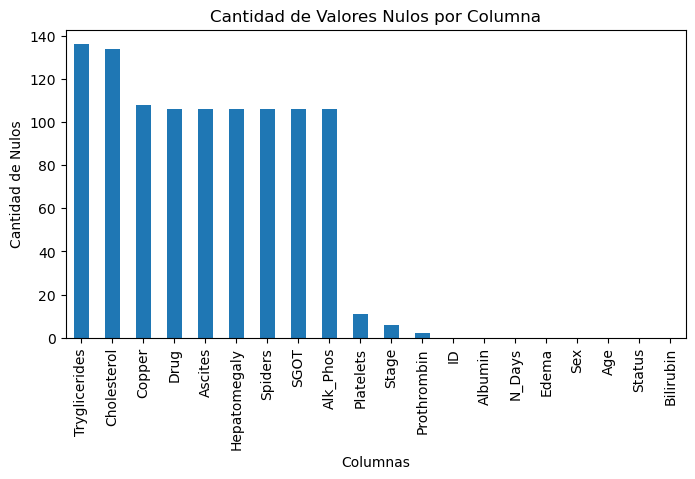

In [7]:
nulos = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
nulos.plot(kind='bar')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')
plt.show()


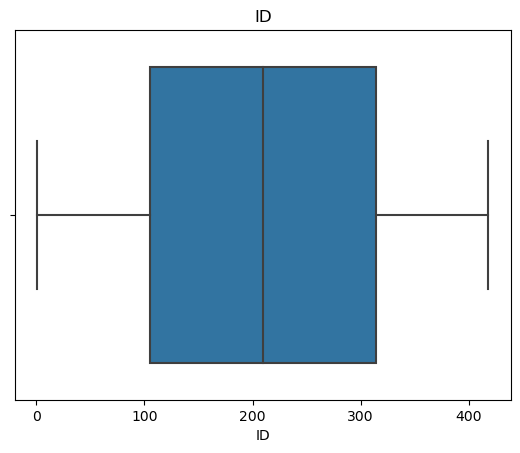

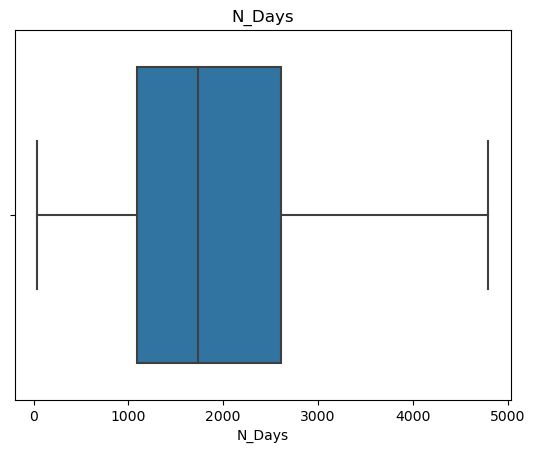

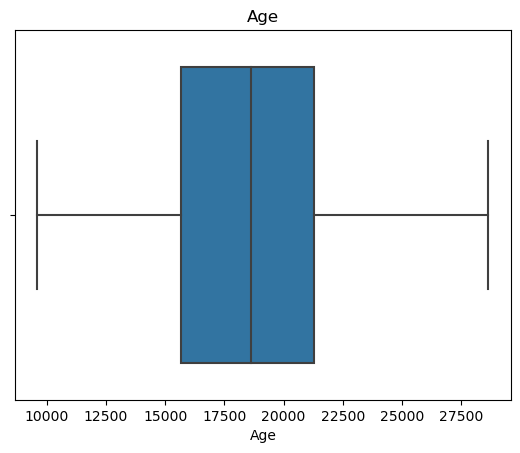

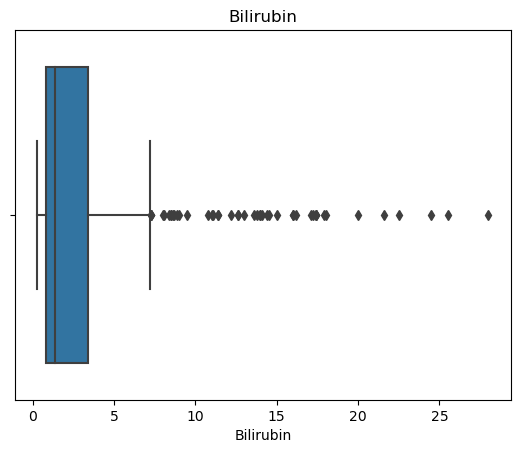

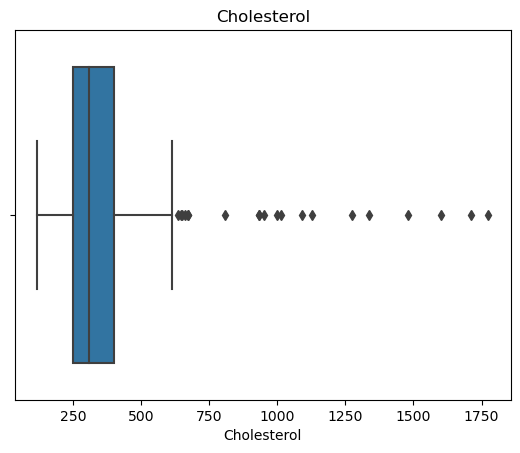

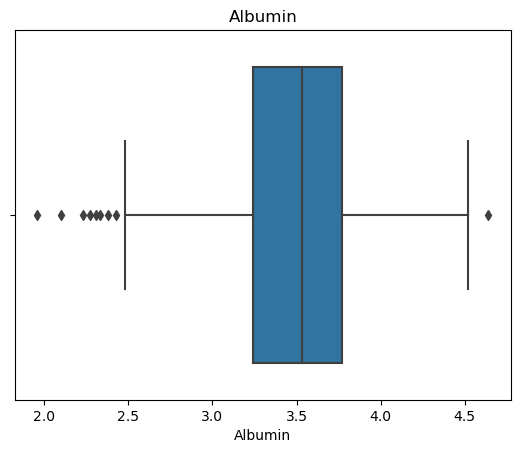

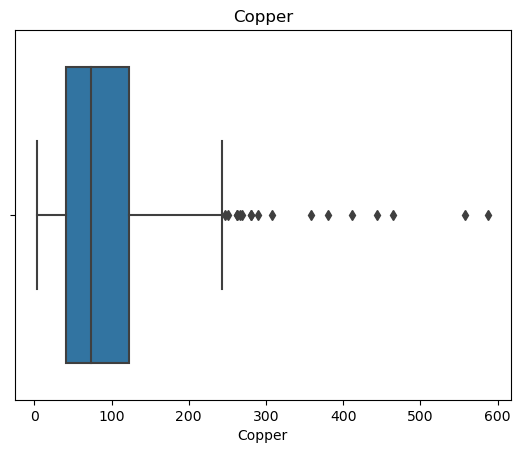

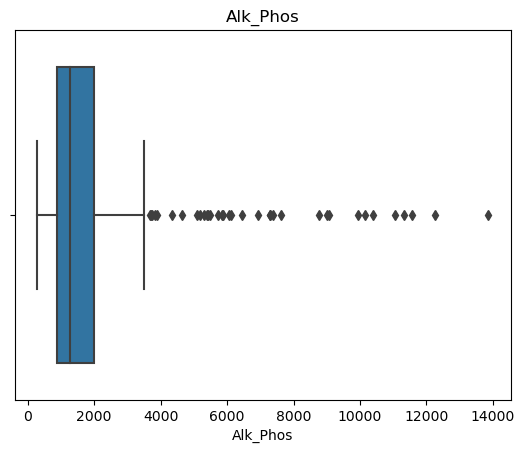

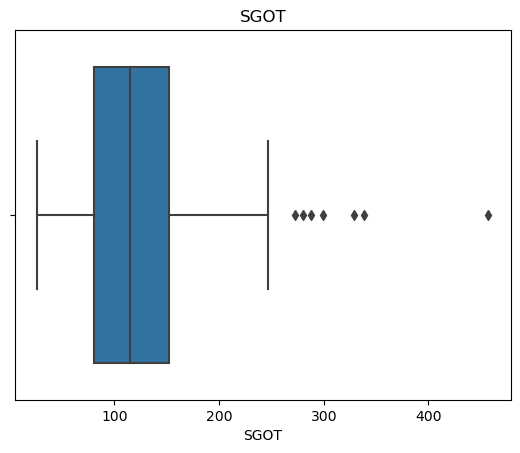

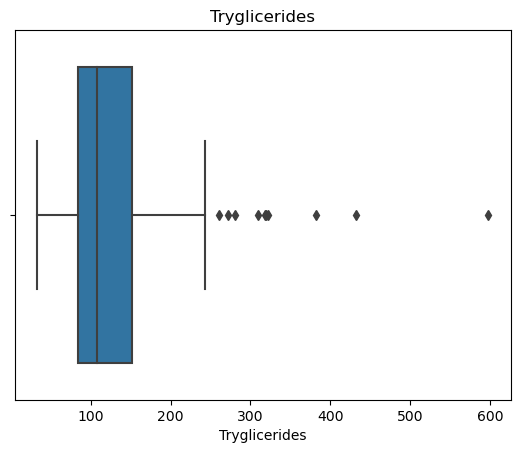

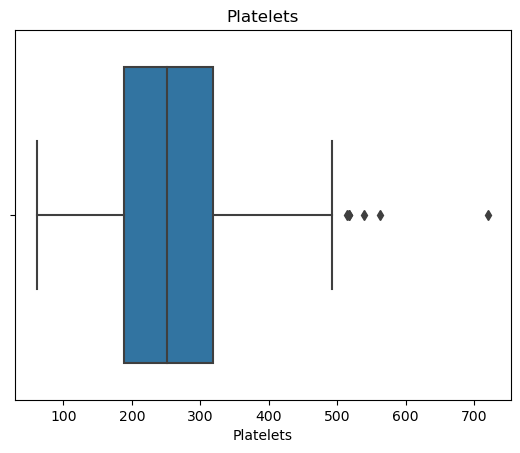

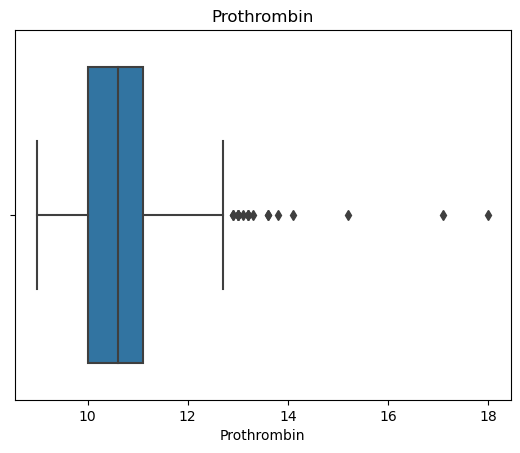

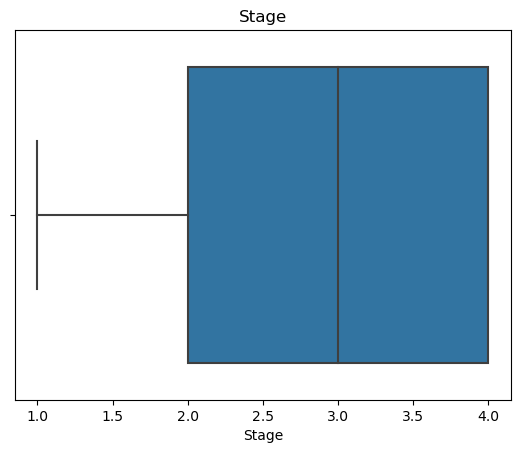

In [8]:
# identificando anomalias
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns

for columna in columnas_numericas:
    sns.boxplot(data=df, x=columna)
    plt.title(columna)
    plt.show()

si, hay algunas columnas con datos fuera del rango esperado, las mas marcadas son la que se mostraron con mayor dispersion.

## Paso 4. Análisis de categorización.
### - Revise las columnas que son de tipo objeto, analice la cantidad de posibilidades que tienen.
### - Determine si una (o algunas) puede ser categorizable, aún no la(s) categorice.

In [9]:
#determinar que columnas de tipo objeto son factibles para categorizar
columnas_objeto = df.select_dtypes(include=[object]).columns
for columna in columnas_objeto:
    print("valores unicos de la columna",columna, ":" ,df[columna].nunique())

valores unicos de la columna Status : 3
valores unicos de la columna Drug : 2
valores unicos de la columna Sex : 2
valores unicos de la columna Ascites : 2
valores unicos de la columna Hepatomegaly : 2
valores unicos de la columna Spiders : 2
valores unicos de la columna Edema : 3


Todas las columnas son factibles, o se podrian categorizar sin algun problema mayor.

## Paso 5. Correlación y análisis del problema.
### - Muestre la correlación de los datos numéricos con respecto a la columna "Status", para ello tendrá que volver numérica dicha columna (para este paso puede usar un encoder).
### - El objetivo es predecir con estos datos la variable "Status".
### - ¿Con los datos que se tienen se puede predecir correctamente esa variable?
### - Si tuviera que seleccionar un modelo para hacer las predicciones, ¿cuál sería?

In [10]:
##Convirtiendo la columna en tipo categoria
df["Status"] = df["Status"].astype("category")

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Crear una instancia del codificador
encoder = LabelEncoder()

#Conviertiendo a numerico
df["Status"] = encoder.fit_transform(df["Status"])

In [13]:
correlaciones=df.corr(numeric_only=True)["Status"]
display(df.corr(numeric_only=True)["Status"])

ID              -0.282416
N_Days          -0.416651
Status           1.000000
Age              0.191525
Bilirubin        0.429722
Cholesterol      0.187275
Albumin         -0.261674
Copper           0.388296
Alk_Phos         0.225822
SGOT             0.294376
Tryglicerides    0.212486
Platelets       -0.083823
Prothrombin      0.339424
Stage            0.320291
Name: Status, dtype: float64

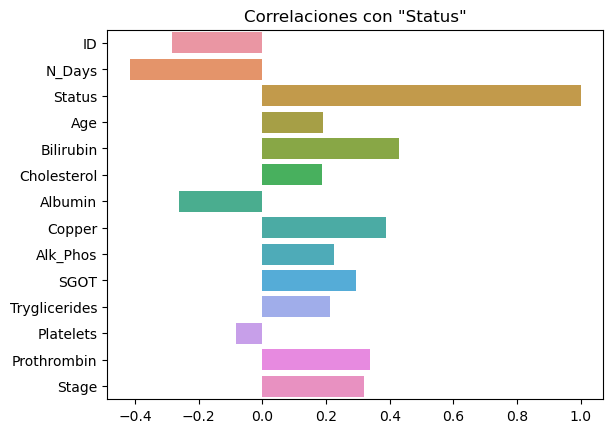

In [14]:
#Mostrando correlaciones
sns.barplot(y=correlaciones.index, x=correlaciones.values, orient='h')
plt.title('Correlaciones con "Status"')
plt.show()

#### Con las correlaciones actuales es posible realizar una prediccion del comportamiento de la variable objetivo, aunque sean pocos datos a mi criterio es posible, yo usaria un modelo como las maquinas de vectores de soporte o un XGBoost

# PARTE II: MANIPULACIÓN Y TRATAMIENTO.

## Paso 1. Tratamiento de datos nulos.
### - Trate los datos nulos acorde a lo que se ha visto previamente en el curso.
### - Muestre la cantidad de datos nulos antes y después del tratamiento.

In [15]:
# antes del tratamiento
print(df.isna().sum().sort_values(ascending=False))

Tryglicerides    136
Cholesterol      134
Copper           108
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
SGOT             106
Alk_Phos         106
Platelets         11
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64


In [16]:
#tratando nulos
#elimando filas con menos del 5% de sus datos nulos
limite = len(df)*0.05
print("El limite para eliminar las filas ", limite)
columnas_a_eliminar = df.columns[df.isna().sum() <= limite]

#Eliminando datos nulos en columnas que superan el limite
df_sin_nulos= df.dropna(subset=columnas_a_eliminar).copy()

El limite para eliminar las filas  20.900000000000002


In [17]:
columnas_float = df_sin_nulos.select_dtypes(include=['float','int']).columns

# Imputando la mediana alas columnas de tipo numerico
for columna in columnas_float:
    mediana = df_sin_nulos[columna].median()
    df_sin_nulos[columna].fillna(mediana, inplace=True)

In [18]:
columnas_objeto = df_sin_nulos.select_dtypes(include=[object]).columns

# Imputando la moda a las columnas de tipo objeto
for columna in columnas_objeto:
    moda = df_sin_nulos[columna].mode().iloc[0]
    df_sin_nulos[columna].fillna(moda, inplace=True)

In [19]:
#depues del tratamiento de nulos
print(df_sin_nulos.isna().sum().sort_values(ascending=False))

ID               0
N_Days           0
Prothrombin      0
Platelets        0
Tryglicerides    0
SGOT             0
Alk_Phos         0
Copper           0
Albumin          0
Cholesterol      0
Bilirubin        0
Edema            0
Spiders          0
Hepatomegaly     0
Ascites          0
Sex              0
Age              0
Drug             0
Status           0
Stage            0
dtype: int64


In [20]:
display(df_sin_nulos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             399 non-null    int64  
 1   N_Days         399 non-null    int64  
 2   Status         399 non-null    int32  
 3   Drug           399 non-null    object 
 4   Age            399 non-null    int64  
 5   Sex            399 non-null    object 
 6   Ascites        399 non-null    object 
 7   Hepatomegaly   399 non-null    object 
 8   Spiders        399 non-null    object 
 9   Edema          399 non-null    object 
 10  Bilirubin      399 non-null    float64
 11  Cholesterol    399 non-null    float64
 12  Albumin        399 non-null    float64
 13  Copper         399 non-null    float64
 14  Alk_Phos       399 non-null    float64
 15  SGOT           399 non-null    float64
 16  Tryglicerides  399 non-null    float64
 17  Platelets      399 non-null    float64
 18  Prothrombi

None

## Paso 2. Tratamiento de anomalías.
### - Enfrente los datos extremos y las anomalías.
### - Es libre de utilizar los métodos que prefiera, trate de no perder muchos datos (se tiene un dataset pequeño).
### - Muestre las distribuciones tratadas antes y después del tratamiento.

In [21]:
# usando los quintiles para tratar anomalias
factor_quintil = 2.0

df_limpio = df_sin_nulos.copy()

# Columnas a las que no se aplicará el proceso de eliminación de anomalías
columnas_con_anomalias = ["Platelets","Prothrombin","Tryglicerides","SGOT","Alk_Phos","Copper","Cholesterol"]

# Itera sobre las columnas numéricas
for columna in columnas_con_anomalias:
    q_80 = df_sin_nulos[columna].quantile(0.8)
    q_20 = df_sin_nulos[columna].quantile(0.2)
    rango = q_80 - q_20
    lsuperior = q_80 + (factor_quintil * rango)
    linferior = q_20 - (factor_quintil * rango)
    df_limpio = df_limpio[(df_limpio[columna] >= linferior) & (df_limpio[columna] <= lsuperior)]

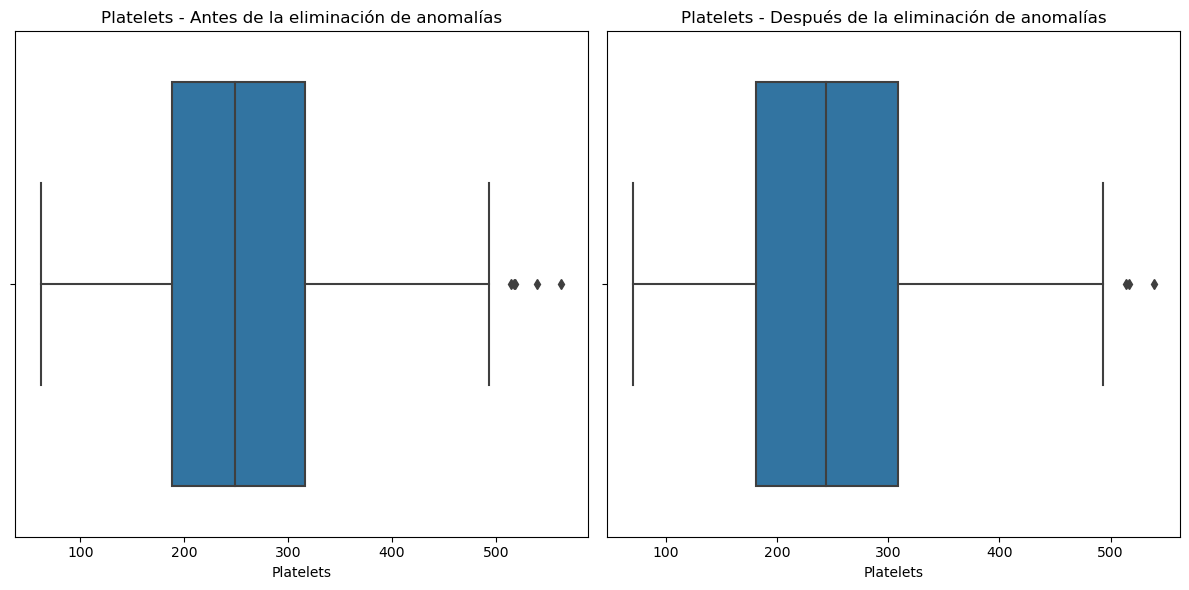

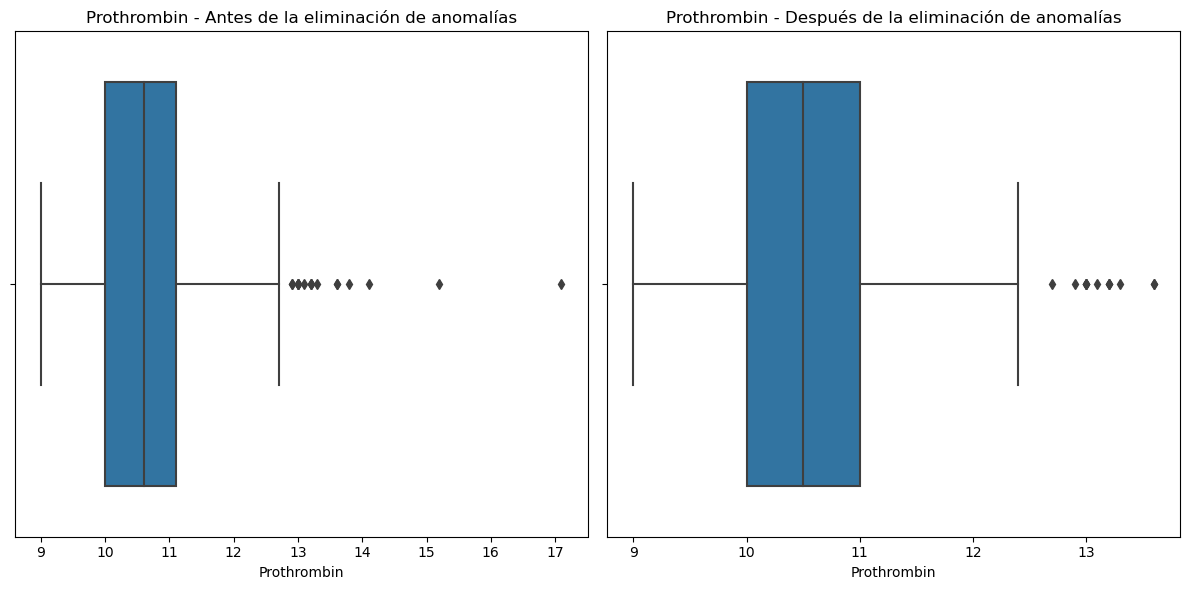

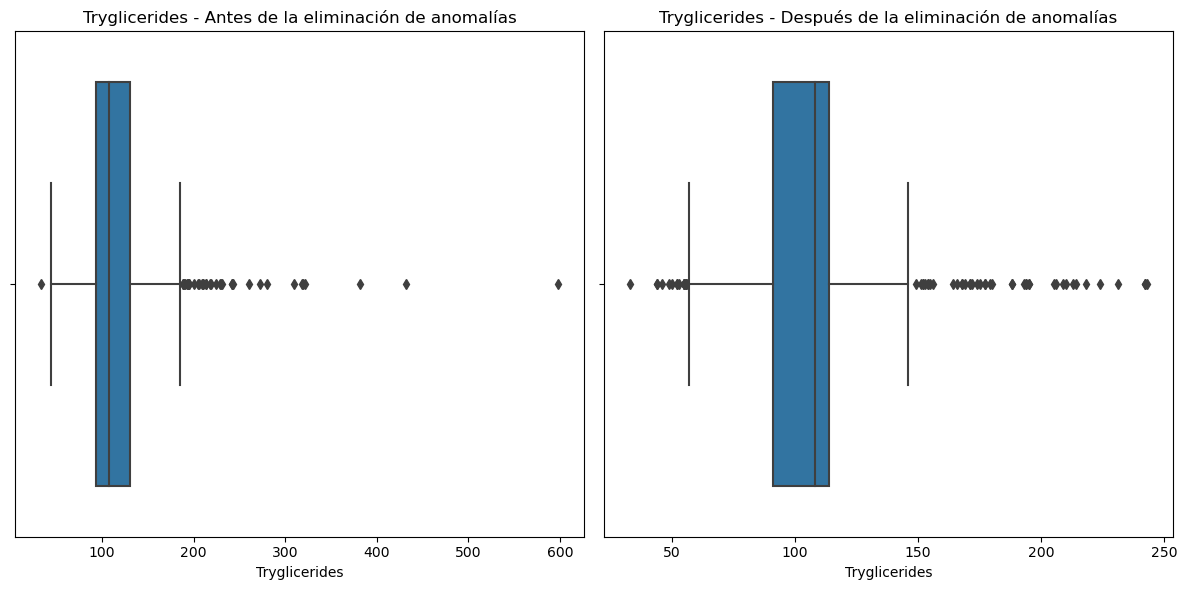

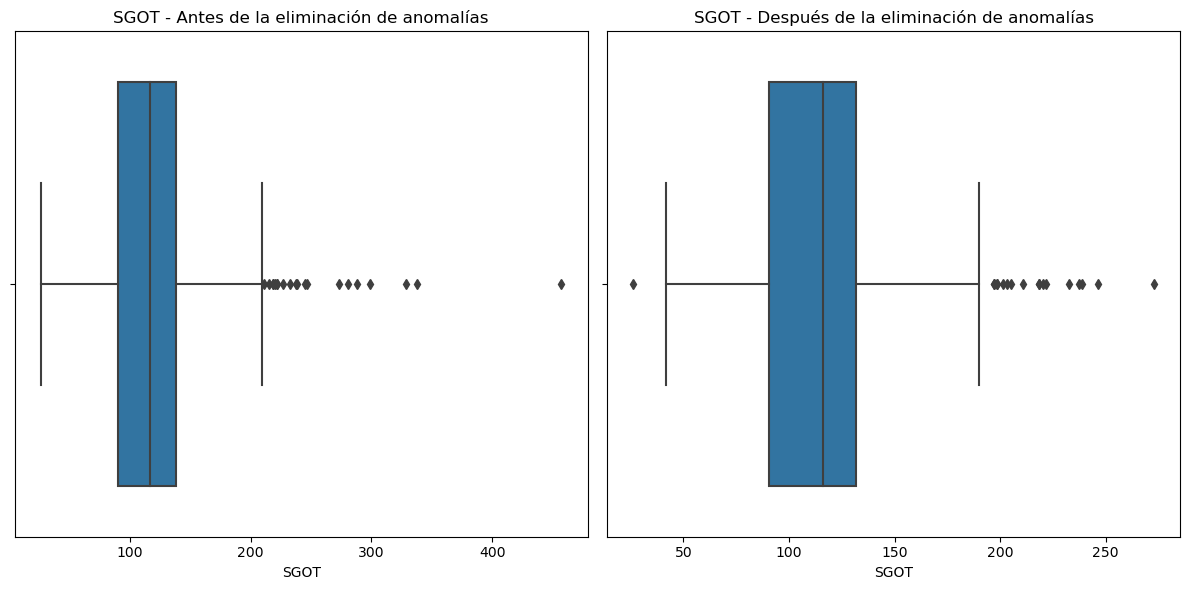

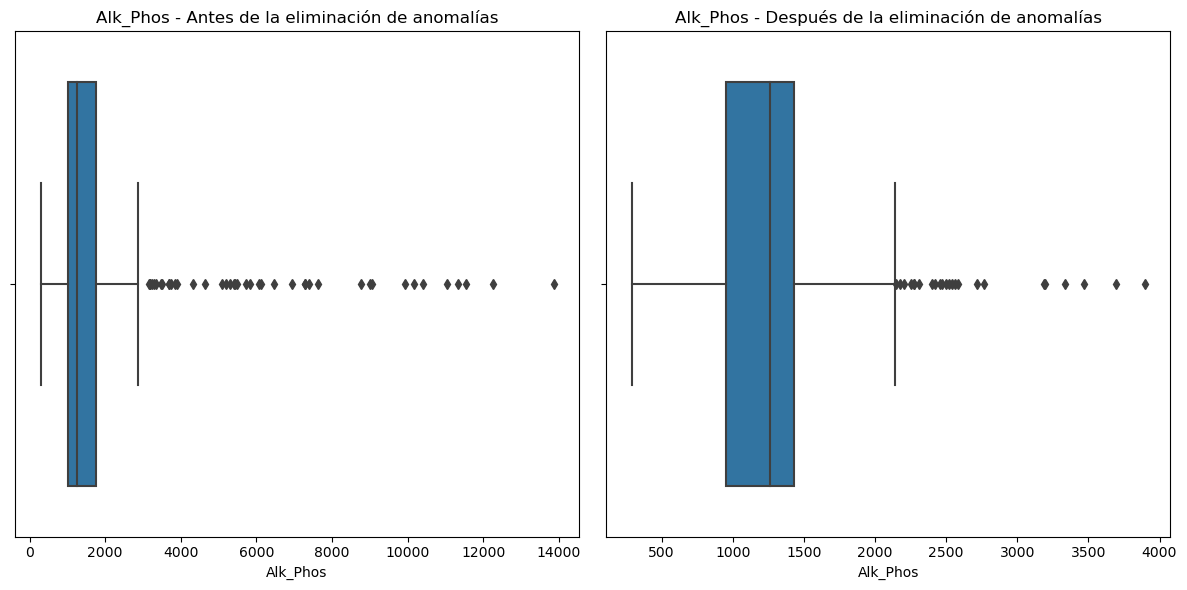

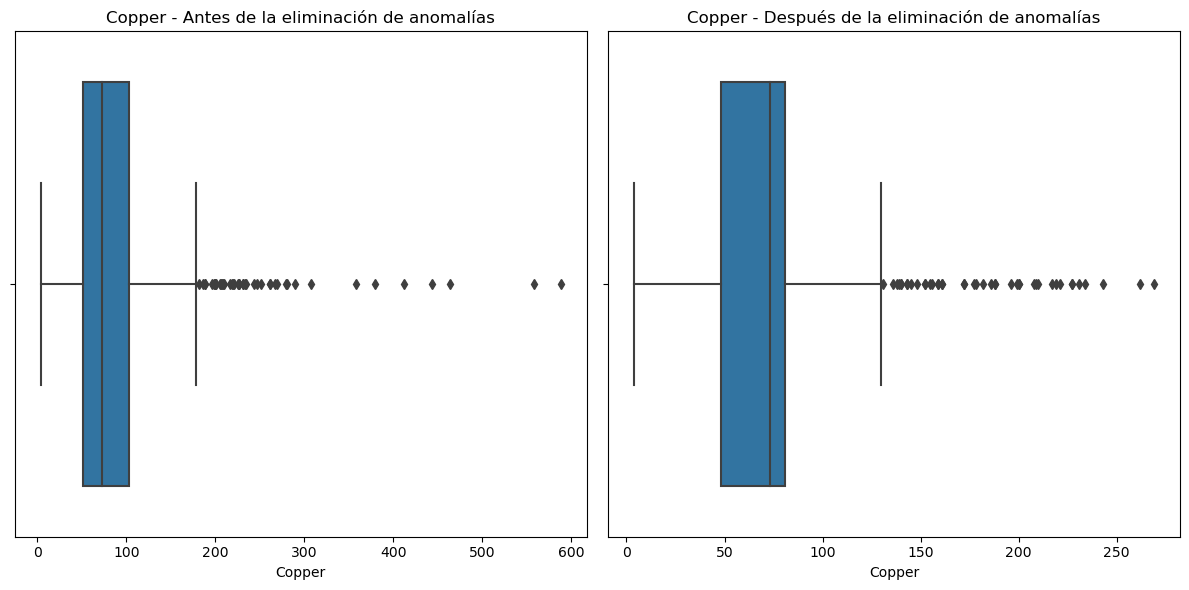

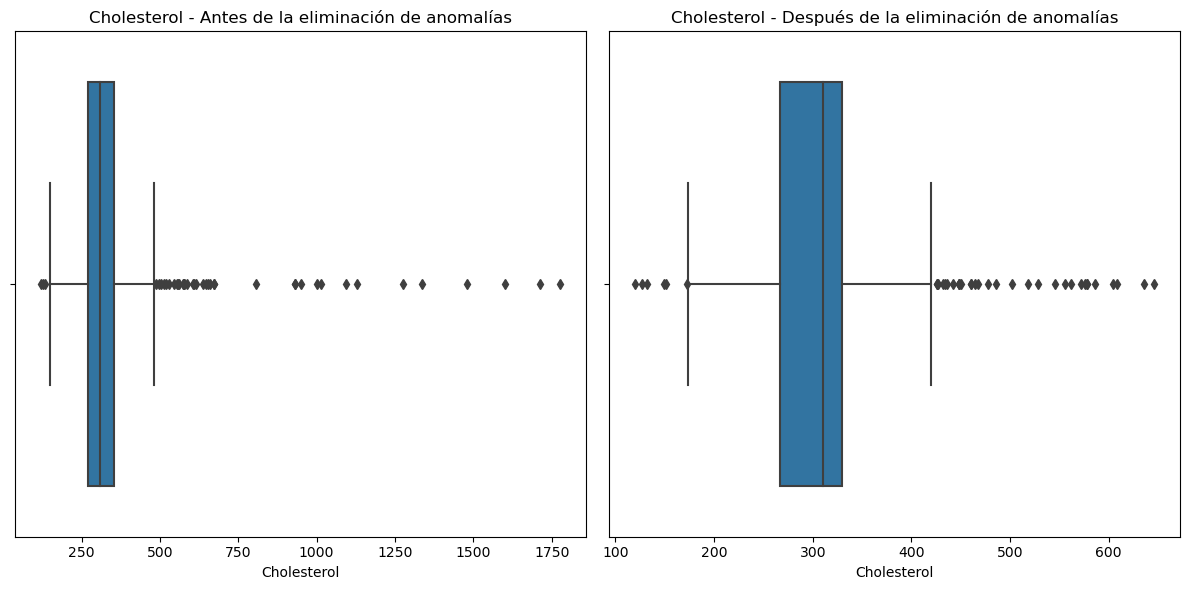

In [22]:
#Mostrar graficas
for columna in columnas_con_anomalias:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_sin_nulos, x=columna)
    plt.title(f"{columna} - Antes de la eliminación de anomalías")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_limpio, x=columna)  # df_sin_anomalias es tu DataFrame después de eliminar anomalías
    plt.title(f"{columna} - Después de la eliminación de anomalías")
    
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## Paso 3. Categorización.
### - Seleccione las columnas de tipo objeto candidatas a la categorización.
### - Realice la categorización.
### - Muestre la información del dataframe para demostrar que se realizó con éxito.

In [23]:
# columnas a categorizar 
columnas_objeto = df_limpio.select_dtypes(include=[object]).columns
print(columnas_objeto)

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


In [24]:
for columna in columnas_objeto:
        df_limpio[columna] = df_limpio[columna].astype("category")

In [25]:
print(df_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             335 non-null    int64   
 1   N_Days         335 non-null    int64   
 2   Status         335 non-null    int32   
 3   Drug           335 non-null    category
 4   Age            335 non-null    int64   
 5   Sex            335 non-null    category
 6   Ascites        335 non-null    category
 7   Hepatomegaly   335 non-null    category
 8   Spiders        335 non-null    category
 9   Edema          335 non-null    category
 10  Bilirubin      335 non-null    float64 
 11  Cholesterol    335 non-null    float64 
 12  Albumin        335 non-null    float64 
 13  Copper         335 non-null    float64 
 14  Alk_Phos       335 non-null    float64 
 15  SGOT           335 non-null    float64 
 16  Tryglicerides  335 non-null    float64 
 17  Platelets      335 non-null    floa

## Paso 4. Tratamiento de incosistencias.
### - En la categorización anterior, ¿hay inconsistencias?
### - Revise las posibles opciones de cada columna categorizada, si encuentra alguna inconsistencia hay que tratarla.
### - Puede emplear gráficas de conteos para validar si una categoría se podría considerar como inconsistente.

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


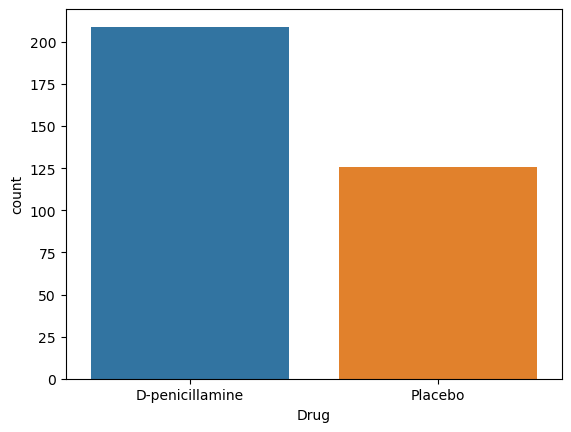

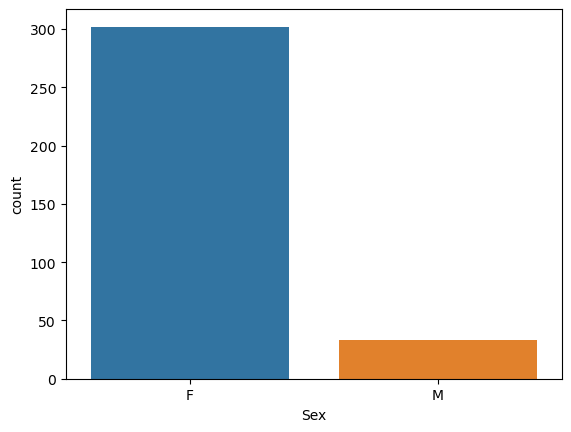

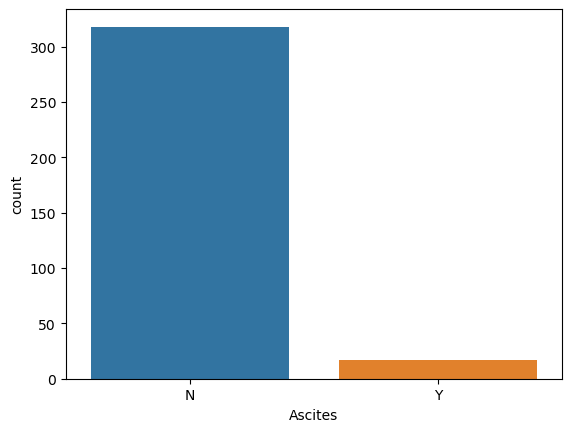

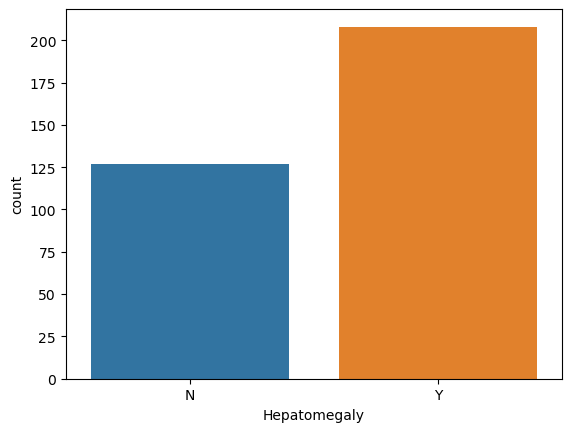

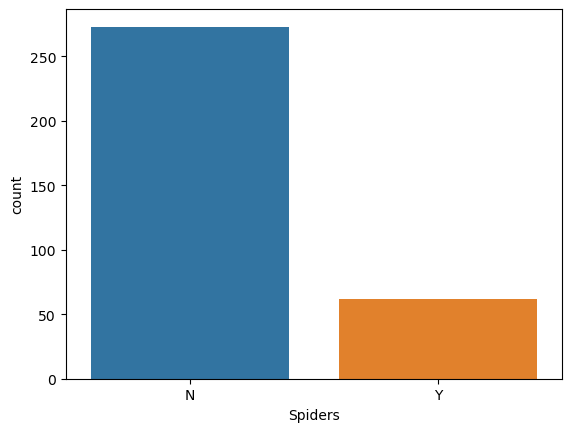

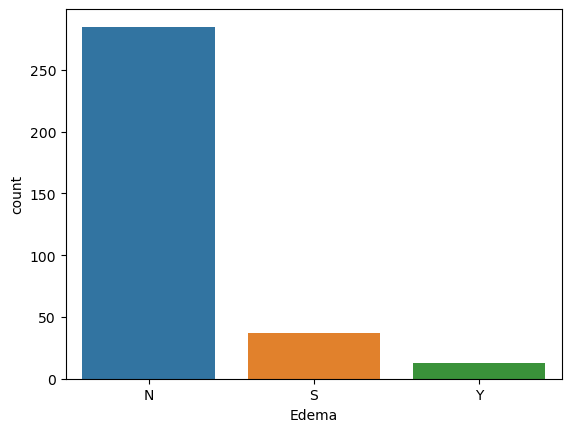

In [26]:
columnas_categoricas = df_limpio.select_dtypes(include=["category"]).columns
print(columnas_categoricas)
for columna in columnas_categoricas:
    sns.countplot(data=df_limpio, x=columna)
    plt.show()

No considero que existan inconsistencias en las columnas categoricas

## Paso 5. Conversión a numérico.
### - Ya que tiene un dataframe sin datos nulos, sin inconsistencias y sin anomalías, hay que convertirlo a numérico.
### - Emplee un tipo de encoding adecuado a cada columna.
### - Construya un nuevo dataframe completamente numérico (incluyendo "Status", este debe ser forzosamente mediante LabelEncoding).
### - Muestre la información del nuevo dataframe.

In [27]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.items():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [28]:
# Crear una instancia del codificador
columnas_categoricas = df_limpio.select_dtypes(include=["category"]).columns

encoder = MultiColumnLabelEncoder()

# Aplicar la transformación a todas las columnas categóricas
df_category = encoder.fit_transform(df_limpio[columnas_categoricas])

columnas_numericas = df_limpio.select_dtypes(include=['int','uint8', 'float'])
df_numeric = pd.DataFrame(data=columnas_numericas, columns=columnas_numericas.columns)

df_final = pd.concat([df_numeric, df_category], axis=1)

In [29]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             335 non-null    int64  
 1   N_Days         335 non-null    int64  
 2   Status         335 non-null    int32  
 3   Age            335 non-null    int64  
 4   Bilirubin      335 non-null    float64
 5   Cholesterol    335 non-null    float64
 6   Albumin        335 non-null    float64
 7   Copper         335 non-null    float64
 8   Alk_Phos       335 non-null    float64
 9   SGOT           335 non-null    float64
 10  Tryglicerides  335 non-null    float64
 11  Platelets      335 non-null    float64
 12  Prothrombin    335 non-null    float64
 13  Stage          335 non-null    float64
 14  Drug           335 non-null    int32  
 15  Sex            335 non-null    int32  
 16  Ascites        335 non-null    int32  
 17  Hepatomegaly   335 non-null    int32  
 18  Spiders   

# PARTE III: MACHINE LEARNING.

## Paso 1. División de los datos.
### - Divide las columnas en la variable "X" y la variable "y".
### - Muestree los datos en dos: entrenamiento y pruebas. La proporción de cada muestra queda a decisión suya.
### - Utilice una semilla para que los resultados puedan ser reproducibles.


In [30]:
X = df_final.drop("Status", axis=1) 
display(X)
y = df_final["Status"]

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,1,2
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,1,0,0,0,1
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0,1,1,0
6,7,1832,20284,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0,1,0,0,1,0,0
8,9,2400,15526,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,24472,1.2,310.0,2.96,73.0,1264.0,116.25,108.0,174.0,10.9,3.0,0,0,0,1,0,0
414,415,1103,14245,0.9,310.0,3.83,73.0,1264.0,116.25,108.0,180.0,11.2,4.0,0,0,0,1,0,0
415,416,1055,20819,1.6,310.0,3.42,73.0,1264.0,116.25,108.0,143.0,9.9,3.0,0,0,0,1,0,0
416,417,691,21185,0.8,310.0,3.75,73.0,1264.0,116.25,108.0,269.0,10.4,3.0,0,0,0,1,0,0


In [129]:
seed = 2036

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed)

## Paso 2. Abordaje mediante modelo simple.
### - Importe un modelo simple de ML, puede ser KNN, Regresión Logística o un árbol de decisión.
### - Entrene el modelo con los datos y realice las predicciones con la muestra de pruebas.
### - Muestre los resultados con f1_score, accuracy_score y classification_report.
### - Analizando el reporte de clasificación, ¿qué tal se desempeñó su modelo?

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

dc=DecisionTreeClassifier(max_depth=10,min_samples_leaf=0.15,min_samples_split=0.20,criterion="log_loss",random_state=seed)
dc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10,
                       min_samples_leaf=0.15, min_samples_split=0.2,
                       random_state=2036)

In [131]:
y_predictc = dc.predict(X_test)
accuracy = accuracy_score(Y_test, y_predictc)
print("accuracy_score:", accuracy)

reporte = classification_report(Y_test, y_predictc)
print("Classification Report:\n", reporte)

accuracy_score: 0.7611940298507462
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85        40
           1       0.00      0.00      0.00         6
           2       0.72      0.62      0.67        21

    accuracy                           0.76        67
   macro avg       0.50      0.52      0.51        67
weighted avg       0.69      0.76      0.72        67



C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analizando los resultados , a mi parecer el modelo tiene un comportamiento mediocre.es decir tiene una calificacion apenas aceptable pero puede mejorarse con facilidad.

## Paso 3. Mejorando el modelo.
### - Emplee GridSearchCV para encontrar los mejores hiperparámetros para su modelo.
### - Valide con varias opciones.
### - Si su modelo no logra mejorar mucho, no se preocupe, es parte del aprendizaje.

In [34]:
from sklearn.model_selection import GridSearchCV as GS

# Definir el rango de hiperparámetros para grid search
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 5, 20, 30],
    'min_samples_split': [0, 5, 10],
    'min_samples_leaf': [0, 2, 4]
}

# Crear el objeto GridSearchCV
grid = GS(DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejor validación cruzada: {:.3f}".format(grid.best_score_))
print("Mejores parámetros: {}".format(grid.best_params_))

Mejor validación cruzada: 0.761
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mjkam\anaconda3\Lib\site-packag

In [35]:
#Probando el nuevo modelo
seed=180
dc=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=5,criterion="entropy",random_state=seed)
dc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=180)

In [36]:
y_predictc = dc.predict(X_test)
accuracy = accuracy_score(Y_test, y_predictc)
print("accuracy_score:", accuracy)

reporte = classification_report(Y_test, y_predictc)
print("Classification Report:\n", reporte)

accuracy_score: 0.7761194029850746
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        40
           1       0.50      0.17      0.25         6
           2       0.80      0.57      0.67        21

    accuracy                           0.78        67
   macro avg       0.69      0.57      0.59        67
weighted avg       0.76      0.78      0.75        67



## Paso 4. Ensambles.
### - Utilice el ensamble de VotingClassifier para mejorar el rendimiento.
### - Seleccione al menos 4 modelos simples diferentes y úselos dentro del ensamble (Stacking).
### - Entrene el meta-modelo y valide su rendimiento con f1_score, accuracy_score y classification_report.
### - Analizando el classification_report, ¿qué tal se desempeñó el modelo?


In [37]:
from sklearn.ensemble import VotingClassifier

#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
seed=98
lr=LogisticRegression(solver='liblinear',max_iter=5000,penalty='l2',random_state=seed)
kn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='euclidean')
dt=DecisionTreeClassifier(random_state=seed)
mvc=SVC(random_state=seed)

clasifiers=[('LogisticRegression',lr),('KNeighborsClassifier',kn),('DecisionTreeClassifier',dt),('SVC',mvc)]

In [39]:
vcc=VotingClassifier(estimators=clasifiers)
vcc.fit(X_train,Y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=5000, random_state=98,
                                                 solver='liblinear')),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(metric='euclidean',
                                                   weights='distance')),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(random_state=98)),
                             ('SVC', SVC(random_state=98))])

In [40]:
y_predictt=vcc.predict(X_test)

In [41]:
accuracy = accuracy_score(Y_test, y_predictt)
print("Accuracy del Voting Classifier:", accuracy)

reporte = classification_report(Y_test, y_predictt)
print("Informe de Clasificación del Voting Classifier:\n", reporte)

Accuracy del Voting Classifier: 0.7761194029850746
Informe de Clasificación del Voting Classifier:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        40
           1       0.00      0.00      0.00         6
           2       1.00      0.57      0.73        21

    accuracy                           0.78        67
   macro avg       0.58      0.52      0.52        67
weighted avg       0.75      0.78      0.73        67



C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El meta-modelo presento un comportamiento muy similar al modelo propuesto anteriormente, por lo que no veo una diferencia muy significativa.

## Paso 5. Modelo supremo.
### - Con los resultados del paso 4 y 5, determine qué camino seguirá: tomar un modelo y mejorarlo o usar el meta-modelo y mejorarlo.
### - Mejore su modelo hasta el máximo, para eso se recomienda utilizar una Pipeline (puede ser con Pipeline o make_pipeline).
### - Dependiendo del modelo que haya seleccionado, debe buscar mejores hiperparámetros, escalar, normalizar, estandarizar o hacer cambios importantes en los datos (como seleccionar únicamente las variables de mayor correlación), también puede emplear PCA para reducir dimensionalidad.
### - El objetivo es que el modelo generado en este paso sea superior a los modelos del paso 4 y 5.
### - Para este paso también puede utilizar las SVM, RandomForest y Redes Neuronales Artificiales (SKLearn).

In [42]:
# probando con un bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

In [43]:
randomForest=RandomForestClassifier(n_estimators=500,max_depth=8,random_state=45)
randomForest.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=45)

In [46]:
y_predict_randomForest=randomForest.predict(X_test)

accuracy = accuracy_score(Y_test, y_predict_randomForest)
print("accuracy", accuracy)
reporte = classification_report(Y_test, y_predict_randomForest)
print("Informe de Clasificación del randomForest:\n", reporte)

accuracy 0.8208955223880597
Informe de Clasificación del randomForest:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89        40
           1       0.00      0.00      0.00         6
           2       0.84      0.76      0.80        21

    accuracy                           0.82        67
   macro avg       0.55      0.58      0.56        67
weighted avg       0.75      0.82      0.78        67



C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#intentando mejorar el modelo
# Definir el rango de hiperparámetros para grid search
param_grid_rf = {
    'n_estimators': [50, 500, 800],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV para RandomForestClassifier
grid_rf = GS(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejor validación cruzada para RandomForestClassifier: {:.3f}".format(grid_rf.best_score_))
print("Mejores parámetros para RandomForestClassifier: {}".format(grid_rf.best_params_))

Mejor validación cruzada para RandomForestClassifier: 0.821
Mejores parámetros para RandomForestClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [55]:
randomForest=RandomForestClassifier(n_estimators=50,criterion='entropy',min_samples_leaf=2,min_samples_split=10,random_state=45)
randomForest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50, random_state=45)

In [56]:
y_predict_randomForest2=randomForest.predict(X_test)

accuracy = accuracy_score(Y_test, y_predict_randomForest2)
print("accuracy", accuracy)
reporte = classification_report(Y_test, y_predict_randomForest2)
print("Informe de Clasificación del randomForest:\n", reporte)

accuracy 0.8208955223880597
Informe de Clasificación del randomForest:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89        40
           1       0.00      0.00      0.00         6
           2       0.84      0.76      0.80        21

    accuracy                           0.82        67
   macro avg       0.55      0.58      0.56        67
weighted avg       0.75      0.82      0.78        67



C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
#intentando con el modelo simple 
seed2=2034
dtc=DecisionTreeClassifier(max_depth=5,min_samples_leaf=0.12,min_samples_split=0.20,criterion="log_loss",random_state=seed2)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=0.12,
                       min_samples_split=0.2, random_state=2034)

In [125]:
y_predict_tree=dtc.predict(X_test)

accuracy = accuracy_score(Y_test,y_predict_tree)
print("accuracy", accuracy)
reporte = classification_report(Y_test,y_predict_tree)
print("Informe de Clasificación del randomForest:\n", reporte)

accuracy 0.8955223880597015
Informe de Clasificación del randomForest:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.00      0.00      0.00         4
           2       0.84      0.89      0.86        18

    accuracy                           0.90        67
   macro avg       0.59      0.62      0.60        67
weighted avg       0.84      0.90      0.87        67



C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mjkam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PARTE IV. PRESENTACIÓN.
## - Emplee PCA con las columnas de la variable X (con los datos completos) y reduzca su dimensionalidad a 2.
## - Muestre un gráfico de dispersión entre esas dos características PCA y colorice con la columna "Status". Para esto puede construir un nuevo dataframe con las 2 columnas obtenidas por PCA y añadiendo la columna "Status" antes de la transformación.
## - Analice si los grupos se pueden separar dentro de ese gráfico.
## - Suba este proyecto a su propio repositorio en GitHub.
## - Documente en un README el proceso realizado en este proyecto.
## - Brinde el enlace al entregar el proyecto en Teams.


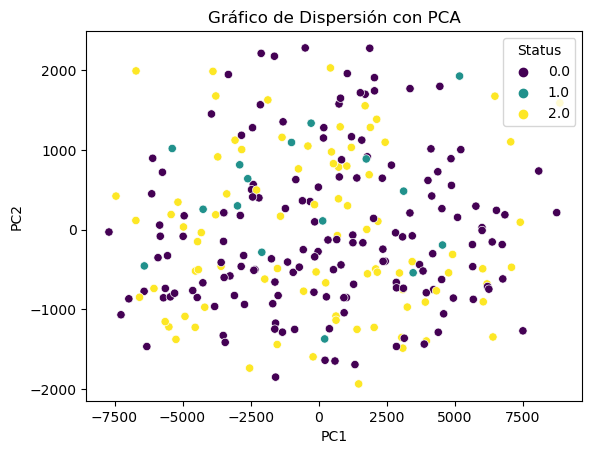

In [134]:
from sklearn.decomposition import PCA

# Copiar el DataFrame original si es necesario
df_pca = df_final.copy()

# Separar las características (X) y la variable objetivo (y)
X_pca = df_pca.drop("Status", axis=1)
y_pca = df_pca["Status"]

# Aplicar PCA y reducir la dimensionalidad a 2
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_pca)

# Crear un nuevo DataFrame con las dos componentes obtenidas por PCA y añadir la columna "Status"
df_pca_result = pd.DataFrame(data=X_pca_2d, columns=["PC1", "PC2"])
df_pca_result["Status"] = y_pca

# Mostrar un gráfico de dispersión con coloración según la columna "Status"
sns.scatterplot(x="PC1", y="PC2", hue="Status", data=df_pca_result, palette="viridis")
plt.title("Gráfico de Dispersión con PCA")
plt.show()

Al menos en 2 componentes visualmente es dificil determinar si se pueden separar los datos en grupos con facilidad, en mi opion no se pueden separar, y se separan los grupos quiza queden mal formados. 